In [6]:
# Adding lensmcmc root to path
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')

In [7]:
# You can define your observation in a .yaml file and use it that way...
from lensmcmc.tools.observation import Observation

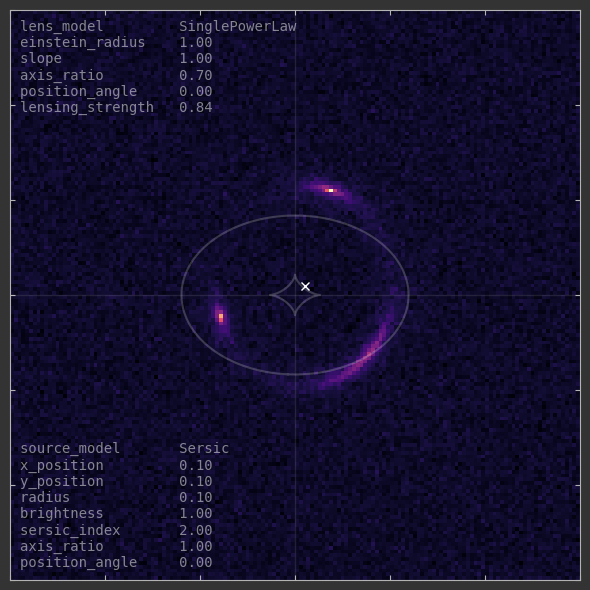

In [10]:
observation = Observation('./settings/defaults/observation_settings.yaml')
observation.plot()
plt.show()

In [11]:
# Or interactively by defining the lens and source models

In [12]:
from lensmcmc.models.masses.SinglePowerLaw import SinglePowerLaw
from lensmcmc.models.sources.Sersic import Sersic

In [14]:
# Models take dictionaries of parameter values so that they are as flexible as possible
lens_model = SinglePowerLaw({
    'lensing_strength': 1.0,
    'slope': 1.0,
    'axis_ratio': 0.7,
    'position_angle': 0.0
})
source_model = Sersic({
    'x_position': 0.1,
    'y_position': 0.1,
    'radius': 0.1,
    'brightness': 1.0,
    'sersic_index': 2.0,
    'axis_ratio': 0.8,
    'position_angle': 0.0
})

In [22]:
# The lens model object handles all the physics stuff
[d for d in dir(lens_model) if '__' not in d]

['a',
 'b',
 'convergence',
 'critical_curve_caustic',
 'deflection_angle',
 'elliptical_radius',
 'image_finder',
 'lens_equation',
 'magnification',
 'potential',
 'q',
 'ray_trace',
 'rotation',
 'shear',
 't']

In [25]:
from lensmcmc.tools.lensing import pixels

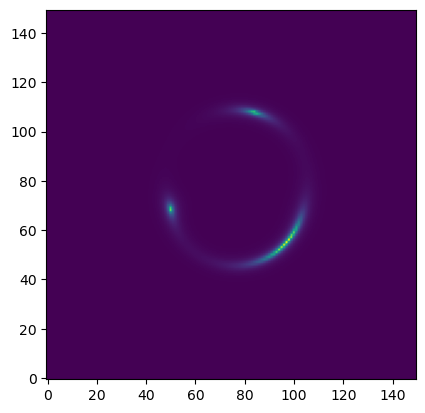

In [24]:
# Image plane is calculated with adaptive sub-pixelisation
# so that areas of higher detail are subsampled more, you can adust this
# with the sub keyword
pix = pixels(0.04, 6.0)
image_plane = lens_model.ray_trace(pix, source_model, sub=10)
plt.imshow(image_plane, origin='lower')
plt.show()